In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [3]:
data = None
for year in range(2007, 2018):
    data_ = pd.read_csv('./stock_data/7201/stocks_7201-T_1d_' + str(year) +  '.csv',encoding='cp932')
    data = data_ if (data is None) else pd.concat([data, data_])
data.columns = ['Date', 'Open', 'High', 'Low', 'Close','Turnover','Value']


In [4]:
data.head()

,Date,Open,High,Low,Close,Turnover,Value
0,2007-12-28,1224.0,1230.0,1211.0,1230.0,5874400,7173788300
1,2007-12-27,1234.0,1237.0,1215.0,1222.0,6361000,7772359000
2,2007-12-26,1224.0,1240.0,1221.0,1233.0,7577500,9352111900
3,2007-12-25,1206.0,1216.0,1201.0,1214.0,7196900,8712295100
4,2007-12-21,1181.0,1197.0,1173.0,1184.0,10802100,12798532500


In [5]:
data.drop(['Date', 'Low','Turnover','Value'], axis=1,inplace=True)

In [6]:
data['Open'] = data['Open']/100
data['High'] = data['High']/100
data['Close'] = data['Close']/100
data.head()
print(data.shape)

(2667, 3)


In [19]:
#Load the data
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    #print(result[0])
    #print(result[1])
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

1.LSTM
   input(None,22,3)
   output(None,22,3)
2.Dropout
3.LSTM
   input(None,22,3)
   output(None,64)
4.Dropout
5.Relu
  input(None,64)
  output(None,16)
6.Linear
  input(None,16)
  output(None,1)

In [20]:
#Build the model
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,init='uniform',activation='relu'))        
        model.add(Dense(1,init='uniform',activation='linear'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [21]:
window = 22
X_train, y_train, X_test, y_test = load_data(data[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (2380, 22, 3)
y_train (2380,)
X_test (264, 22, 3)
y_test (264,)


In [18]:
# model = build_model([3,lag,1])
model = build_model2([3,window,1])
#model.summary()

/Users/hagiwara/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
/Users/hagiwara/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`


In [60]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=500,
    validation_split=0.1,
    verbose=1)

/Users/hagiwara/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2142 samples, validate on 238 samples
Epoch 1/500
2142/2142 [==============================] - 4s - loss: 0.0079 - acc: 0.0000e+00 - val_loss: 0.0050 - val_acc: 0.0000e+00
Epoch 2/500
2142/2142 [==============================] - 2s - loss: 0.0050 - acc: 0.0000e+00 - val_loss: 5.3527e-04 - val_acc: 0.0000e+00
Epoch 3/500
2142/2142 [==============================] - 2s - loss: 0.0013 - acc: 0.0000e+00 - val_loss: 5.1478e-04 - val_acc: 0.0000e+00
Epoch 4/500
2142/2142 [==============================] - 2s - loss: 4.8027e-04 - acc: 0.0000e+00 - val_loss: 5.3241e-04 - val_acc: 0.0000e+00
Epoch 5/500
2142/2142 [==============================] - 2s - loss: 7.9411e-04 - acc: 0.0000e+00 - val_loss: 2.4494e-04 - val_acc: 0.0000e+00
Epoch 6/500
2142/2142 [==============================] - 2s - loss: 3.4463e-04 - acc: 0.0000e+00 - val_loss: 6.4646e-04 - val_acc: 0.0000e+00
Epoch 7/500
2142/2142 [==============================] - 2s - loss: 4.6860e-04 - acc: 0.0000e+00 - val_loss: 3.0962e-

2142/2142 [==============================] - 2s - loss: 4.0722e-05 - acc: 0.0000e+00 - val_loss: 5.5706e-05 - val_acc: 0.0000e+00
Epoch 116/500
2142/2142 [==============================] - 2s - loss: 4.1771e-05 - acc: 0.0000e+00 - val_loss: 5.8173e-05 - val_acc: 0.0000e+00
Epoch 117/500
2142/2142 [==============================] - 2s - loss: 3.8710e-05 - acc: 0.0000e+00 - val_loss: 5.9030e-05 - val_acc: 0.0000e+00
Epoch 118/500
2142/2142 [==============================] - 2s - loss: 3.9461e-05 - acc: 0.0000e+00 - val_loss: 7.1289e-05 - val_acc: 0.0000e+00
Epoch 119/500
2142/2142 [==============================] - 2s - loss: 4.2419e-05 - acc: 0.0000e+00 - val_loss: 6.2373e-05 - val_acc: 0.0000e+00
Epoch 120/500
2142/2142 [==============================] - 2s - loss: 3.9748e-05 - acc: 0.0000e+00 - val_loss: 6.6823e-05 - val_acc: 0.0000e+00
Epoch 121/500
2142/2142 [==============================] - 2s - loss: 4.2780e-05 - acc: 0.0000e+00 - val_loss: 5.4134e-05 - val_acc: 0.0000e+00
Epoch 

2142/2142 [==============================] - 2s - loss: 2.1520e-05 - acc: 0.0000e+00 - val_loss: 3.3252e-05 - val_acc: 0.0000e+00
Epoch 228/500
2142/2142 [==============================] - 2s - loss: 2.0984e-05 - acc: 0.0000e+00 - val_loss: 3.2190e-05 - val_acc: 0.0000e+00
Epoch 229/500
2142/2142 [==============================] - 2s - loss: 2.0278e-05 - acc: 0.0000e+00 - val_loss: 3.3969e-05 - val_acc: 0.0000e+00
Epoch 230/500
2142/2142 [==============================] - 2s - loss: 2.0088e-05 - acc: 0.0000e+00 - val_loss: 3.2956e-05 - val_acc: 0.0000e+00
Epoch 231/500
2142/2142 [==============================] - 2s - loss: 1.9397e-05 - acc: 0.0000e+00 - val_loss: 3.2834e-05 - val_acc: 0.0000e+00
Epoch 232/500
2142/2142 [==============================] - 2s - loss: 2.0157e-05 - acc: 0.0000e+00 - val_loss: 3.2392e-05 - val_acc: 0.0000e+00
Epoch 233/500
2142/2142 [==============================] - 2s - loss: 2.0025e-05 - acc: 0.0000e+00 - val_loss: 3.2256e-05 - val_acc: 0.0000e+00
Epoch 

2142/2142 [==============================] - 2s - loss: 1.4361e-05 - acc: 0.0000e+00 - val_loss: 2.2106e-05 - val_acc: 0.0000e+00
Epoch 340/500
2142/2142 [==============================] - 2s - loss: 1.3683e-05 - acc: 0.0000e+00 - val_loss: 2.3262e-05 - val_acc: 0.0000e+00
Epoch 341/500
2142/2142 [==============================] - 2s - loss: 1.3811e-05 - acc: 0.0000e+00 - val_loss: 2.1197e-05 - val_acc: 0.0000e+00
Epoch 342/500
2142/2142 [==============================] - 2s - loss: 1.3255e-05 - acc: 0.0000e+00 - val_loss: 2.1008e-05 - val_acc: 0.0000e+00
Epoch 343/500
2142/2142 [==============================] - 2s - loss: 1.3362e-05 - acc: 0.0000e+00 - val_loss: 2.1112e-05 - val_acc: 0.0000e+00
Epoch 344/500
2142/2142 [==============================] - 2s - loss: 1.3532e-05 - acc: 0.0000e+00 - val_loss: 2.0165e-05 - val_acc: 0.0000e+00
Epoch 345/500
2142/2142 [==============================] - 2s - loss: 1.3699e-05 - acc: 0.0000e+00 - val_loss: 2.0134e-05 - val_acc: 0.0000e+00
Epoch 

2142/2142 [==============================] - 2s - loss: 1.1078e-05 - acc: 0.0000e+00 - val_loss: 1.6154e-05 - val_acc: 0.0000e+00
Epoch 452/500
2142/2142 [==============================] - 2s - loss: 1.1379e-05 - acc: 0.0000e+00 - val_loss: 1.7021e-05 - val_acc: 0.0000e+00
Epoch 453/500
2142/2142 [==============================] - 2s - loss: 1.1950e-05 - acc: 0.0000e+00 - val_loss: 1.8437e-05 - val_acc: 0.0000e+00
Epoch 454/500
2142/2142 [==============================] - 2s - loss: 1.3665e-05 - acc: 0.0000e+00 - val_loss: 1.6443e-05 - val_acc: 0.0000e+00
Epoch 455/500
2142/2142 [==============================] - 2s - loss: 1.1673e-05 - acc: 0.0000e+00 - val_loss: 1.5329e-05 - val_acc: 0.0000e+00
Epoch 456/500
2142/2142 [==============================] - 2s - loss: 1.1131e-05 - acc: 0.0000e+00 - val_loss: 1.6222e-05 - val_acc: 0.0000e+00
Epoch 457/500
2142/2142 [==============================] - 2s - loss: 1.1809e-05 - acc: 0.0000e+00 - val_loss: 1.6466e-05 - val_acc: 0.0000e+00
Epoch 

In [74]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
#print(model.metrics_names[0])
print('Train Score: %.5f MSE (%.5f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.5f MSE (%.5f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.00001 MSE (0.00279 RMSE)
Test Score: 0.00010 MSE (0.00978 RMSE)


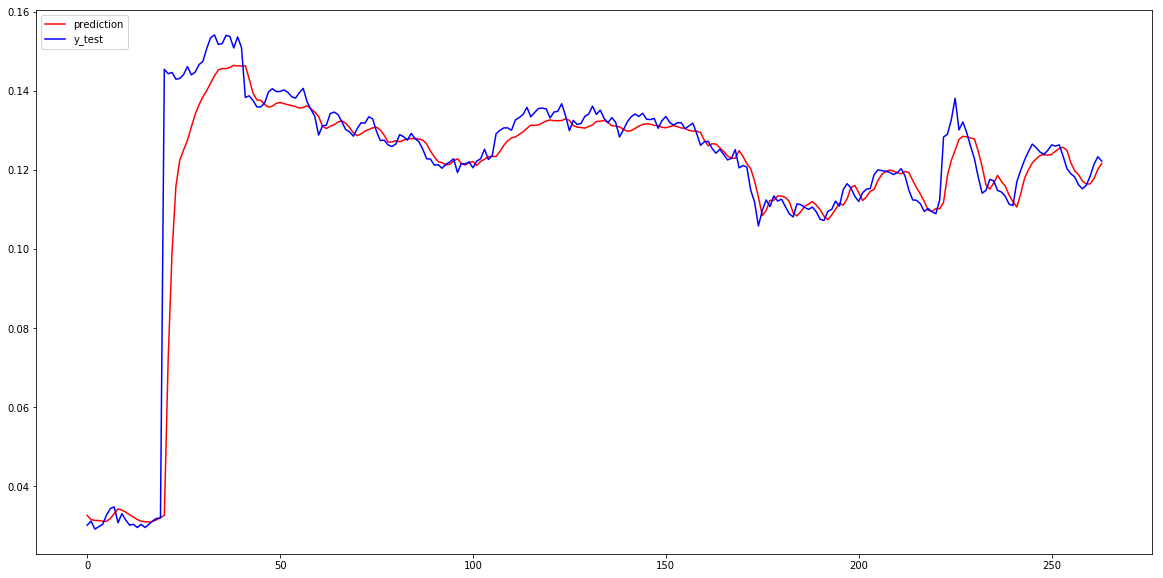

In [73]:
import matplotlib.pyplot as plt2

p = model.predict(X_test)
plt2.figure(figsize=(20,10))
plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

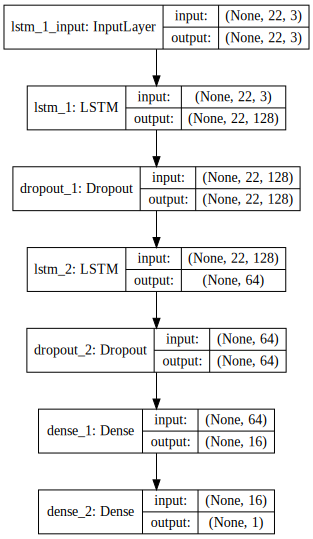

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))